In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

base_folder = '/content/drive/MyDrive/Stock Price Prediction/'
os.chdir(base_folder) # change the current working directory to

Mounted at /content/drive


In [ ]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-6dem68mp
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-6dem68mp
  Created wheel for pandas-datareader: filename=pandas_datareader-0.11.0.dev0+6.gfdade48-py3-none-any.whl size=109747 sha256=046af4d341455feef50192d3ff25c94272baa327533d7b2f98c07998b30124ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-_xvyj6i4/wheels/54/6a/47/b1e68c4877ae6bf9a511e84e13972507e0fac9e17335156eb7
Successfully built pandas-datareader
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt
from pytz import timezone

import pandas_datareader.data as web

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
symbol = ['BB']

#entry_start_date = input('Enter the Start Date in MM/DD/YYYY Format: ')
entry_start_date = '01/01/2017'
strt_mth, strt_dy, strt_yr = map(int, entry_start_date.split('/'))
start_date = dt.date(strt_yr, strt_mth, strt_dy)

today = dt.date.today() 
end_date = today
#end_date = dt.date(2015, 12, 31)

# How many days do you want to base your prediction on
# How many days do you want to look back to decide what the price is going to be for the next day
prediction_days = 22

train_side = 0.60
val_side = 0.20
test_side = 1 - train_side - val_side

n_epoch = 1200

In [ ]:
for index_1, value_1 in enumerate(symbol):
  exec("{x} = web.DataReader(name = '{y}', data_source = 'yahoo', start = start_date, end = end_date)".format(x = value_1.lower().replace('-', '_'), y = value_1)) 
  exec('target_column = {x}.columns.values.tolist()'.format(x = value_1.lower().replace('-', '_')))
  exec('train_{x} = {x}.iloc[0: round({x}.shape[0] * train_side), :]'.format(x = value_1.lower().replace('-', '_')))
  exec('val_{x} = {x}.iloc[round({x}.shape[0] * train_side): round({x}.shape[0] * (train_side + val_side)), :]'.format(x = value_1.lower().replace('-', '_')))
  exec('test_{x} = {x}.iloc[round({x}.shape[0] * (train_side + val_side)):, :]'.format(x = value_1.lower().replace('-', '_')))

  exec('actual_prices_{x} = test_{x}.values'.format(x = value_1.lower().replace('-', '_')))

  exec('scaler_{x} = MinMaxScaler(feature_range = (0, 1))'.format(x = index_1))

  for value_2 in ['train', 'val']:
    exec('scaled_{z}_{x} = scaler_{y}.fit_transform({z}_{x}.values.reshape(-1, {z}_{x}.shape[1]))'.format(x = value_1.lower().replace('-', '_'), y = index_1, z= value_2))
    exec('X_{z}_{x}, Y_{z}_{x} = [], []'.format(x = value_1.lower().replace('-', '_'), z= value_2))
    exec('for x in range(prediction_days, len({z}_{x})): X_{z}_{x}.append(scaled_{z}_{x}[(x - prediction_days): x, :]); Y_{z}_{x}.append(scaled_{z}_{x}[x, :])'.format(x = value_1.lower().replace('-', '_'), z = value_2))
    exec('X_{z}_{x}, Y_{z}_{x} = np.array(X_{z}_{x}), np.array(Y_{z}_{x})'.format(x = value_1.lower().replace('-', '_'), z = value_2))
    exec('if X_{z}_{x}.ndim == 2: X_{z}_{x} = np.reshape(X_{z}_{x}, (X_{z}_{x}.shape[0], X_{z}_{x}.shape[1], 1))'.format(x = value_1.lower().replace('-', '_'), z = value_2)) 

  exec('model_inputs_{y} = {x}[len({x}) - len(test_{x}) - prediction_days: ]'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 
  exec('scaled_test_{x} = scaler_{y}.fit_transform(model_inputs_{y}.values.reshape(-1, model_inputs_{y}.shape[1]))'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 
  exec('X_test_{x}, Y_test_{x} = [], []'.format(x = value_1.lower().replace('-', '_'))) 
  exec('for x in range(prediction_days, model_inputs_{y}.shape[0]): Y_test_{x}.append(scaled_test_{x}[x, :])'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 
  exec('for x in range(prediction_days, model_inputs_{y}.shape[0] + 1): X_test_{x}.append(scaled_test_{x}[x - prediction_days: x, :])'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 
  exec('X_test_{x}, Y_test_{x} = np.array(X_test_{x}), np.array(Y_test_{x})'.format(x = value_1.lower().replace('-', '_')))
  exec('if X_test_{x}.ndim == 2: X_test_{x} = np.reshape(X_test_{x}, (X_test_{x}.shape[0], X_test_{x}.shape[1], 1))'.format(x = value_1.lower().replace('-', '_'))) 

In [ ]:
eval('{x}'.format(x = symbol[0].lower().replace('-', '_')))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,7.01,6.86,6.93,6.96,4903000,6.96
2017-01-04,7.15,7.00,7.04,7.11,4255700,7.11
2017-01-05,7.24,7.09,7.13,7.12,3259300,7.12
2017-01-06,7.16,7.04,7.11,7.16,3898000,7.16
2017-01-09,7.19,7.07,7.15,7.12,2898500,7.12
...,...,...,...,...,...,...
2021-08-23,10.24,9.67,9.70,10.14,8709300,10.14
2021-08-24,11.34,10.13,10.13,11.10,24435400,11.10
2021-08-25,11.68,10.66,11.23,10.74,26337600,10.74


In [ ]:
for value_1 in symbol:
  exec('X_train, X_val, Y_train, Y_val = X_train_{x}, X_val_{x}, Y_train_{x}, Y_val_{x}'.format(x = value_1.lower().replace('-', '_')))

In [ ]:
exec("file_dir = 'BestModel.h5_{x}_' + dt.datetime.now(timezone('EST')).strftime('%Y%m%d-%H%M%S')".format(x = value_1.lower().replace('-', '_'))) 

class MyHistory(callbacks.Callback):
  def on_train_begin(self, logs = None):
    self.gradient, self.gradsNorm, self.batch_loss, self.epoch_loss = [], [], [], [] 
  def on_epoch_end(self, epoch, logs = None):
    with tf.GradientTape() as tape: 
      Y_batch_pred = model(X_train, training = True) 
      loss_val = loss_fn(Y_train,Y_batch_pred)
    grads = tape.gradient(loss_val, model.trainable_weights)
    self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grads])))
    self.gradient.append(grads)
    self.batch_loss.append(loss_val.numpy())
    epoch_loss_value = model.evaluate(X_train, Y_train, verbose = 1)
    self.epoch_loss.append(epoch_loss_value)

MyMonitor = MyHistory()

checkpointer = callbacks.ModelCheckpoint(filepath = file_dir, monitor = 'val_loss', save_best_only = True, mode = 'min')

model = Sequential()

model.add(keras.layers.InputLayer(input_shape = X_train.shape[1:]))

#model.add( keras.layers.Dropout(rate = 0.2) )

model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))

model.add( keras.layers.Dropout(rate = 0.2) )

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))

model.add( keras.layers.Dropout(rate = 0.2) )

model.add(LSTM(units = 32, activation = 'relu'))

model.add( keras.layers.Dropout(rate = 0.2) )

exec( 'model.add(Dense(units = X_test_{x}.shape[X_test_{x}.ndim - 1]))'.format(x = symbol[0].lower().replace('-', '_')) )

model.add(Activation('relu'))

opt = optimizers.Adam(learning_rate = 1e-5, decay = 1e-7)
loss_fn = losses.MeanSquaredError()
model.compile(loss = loss_fn, optimizer = opt)

monitor = model.fit(x = X_train, y = Y_train, epochs = n_epoch, batch_size = int((X_train.shape[0])**0.5), 
                    validation_data = (X_val, Y_val), 
                    callbacks = [checkpointer, MyMonitor], shuffle = True)

trained_model = load_model(file_dir)

training_loss = MyMonitor.epoch_loss
validation_loss = monitor.history['val_loss']
batch_loss = MyMonitor.batch_loss
last_epoch = len(pd.DataFrame(monitor.history).index)

for index_1, value_1 in enumerate(symbol):
  exec("monitor_{x} = pd.concat([pd.DataFrame(training_loss, columns = ['train_loss']), pd.DataFrame(validation_loss, columns = ['val_loss'])], axis = 1)".format(x = value_1.lower().replace('-', '_')))
  exec("monitor_{x}.to_csv(base_folder + file_dir + '/monitor_{x}.csv')".format(x = value_1.lower().replace('-', '_')))

  exec('predicted_prices_{x} = trained_model.predict(X_test_{x})'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 
  exec('predicted_prices_{x} = scaler_{y}.inverse_transform(predicted_prices_{x})'.format(x = value_1.lower().replace('-', '_'), y = index_1)) 

  exec("price_{x} = pd.concat([test_{x}.reset_index(inplace = False), pd.DataFrame(predicted_prices_{x}, columns = [s  + ' predicted' for s in target_column])], axis = 1)".format(x = value_1.lower().replace('-', '_'), y = target_column))
  exec("price_{x}.to_csv(base_folder + file_dir + '/price_{x}.csv')".format(x = value_1.lower().replace('-', '_')))

Epoch 1/1200
27/27 [==============================] - 5s 54ms/step - loss: 0.2104 - val_loss: 0.2726
INFO:tensorflow:Assets written to: BestModel.h5_bb_20210829-193036/assets
22/22 [==============================] - 0s 9ms/step - loss: 0.2103
Epoch 2/1200
27/27 [==============================] - 1s 35ms/step - loss: 0.2078 - val_loss: 0.2696
INFO:tensorflow:Assets written to: BestModel.h5_bb_20210829-193036/assets
22/22 [==============================] - 0s 9ms/step - loss: 0.2080
Epoch 3/1200
27/27 [==============================] - 1s 38ms/step - loss: 0.2057 - val_loss: 0.2665
INFO:tensorflow:Assets written to: BestModel.h5_bb_20210829-193036/assets
22/22 [==============================] - 0s 9ms/step - loss: 0.2056
Epoch 4/1200
27/27 [==============================] - 1s 35ms/step - loss: 0.2032 - val_loss: 0.2632
INFO:tensorflow:Assets written to: BestModel.h5_bb_20210829-193036/assets
22/22 [==============================] - 0s 9ms/step - loss: 0.2031
Epoch 5/1200
27/27 [========

In [ ]:
eval("price_{x}.iloc[-10:, 1:]".format(x = symbol[0].lower().replace('-', '_')))

,High,Low,Open,Close,Volume,Adj Close,High predicted,Low predicted,Open predicted,Close predicted,Volume predicted,Adj Close predicted
225,9.87,9.48,9.60,9.67,9442700.0,9.67,12.156584,9.257562,9.490834,11.107101,40355324.0,10.853753
226,10.33,9.72,9.81,10.08,9796000.0,10.08,12.113035,9.229662,9.461230,11.069721,40266052.0,10.811522
227,9.98,9.53,9.88,9.56,7847800.0,9.56,12.046647,9.187327,9.416197,11.013119,40217320.0,10.749278
228,9.81,9.48,9.57,9.63,5330300.0,9.63,11.970494,9.138800,9.364542,10.948069,40191656.0,10.678365
229,10.24,9.67,9.70,10.14,8709300.0,10.14,11.883772,9.083725,9.306436,10.874179,40196796.0,10.598546
230,11.34,10.13,10.13,11.10,24435400.0,11.10,11.791904,9.023707,9.243121,10.796803,40281804.0,10.515512
231,11.68,10.66,11.23,10.74,26337600.0,10.74,11.735949,8.985604,9.203489,10.751266,40470408.0,10.468075
232,11.18,10.56,10.73,10.81,13356700.0,10.81,11.749559,8.992265,9.211520,10.766570,40750884.0,10.487849
233,11.40,10.80,10.81,11.30,12651000.0,11.30,11.817182,9.033353,9.256208,10.827746,41022984.0,10.556579
234,NaN,NaN,NaN,NaN,NaN,NaN,11.947195,9.114125,9.343380,10.941628,41239176.0,10.680543


In [ ]:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 22, 64)            18176     
_________________________________________________________________
dropout (Dropout)            (None, 22, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 22, 50)            23000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1

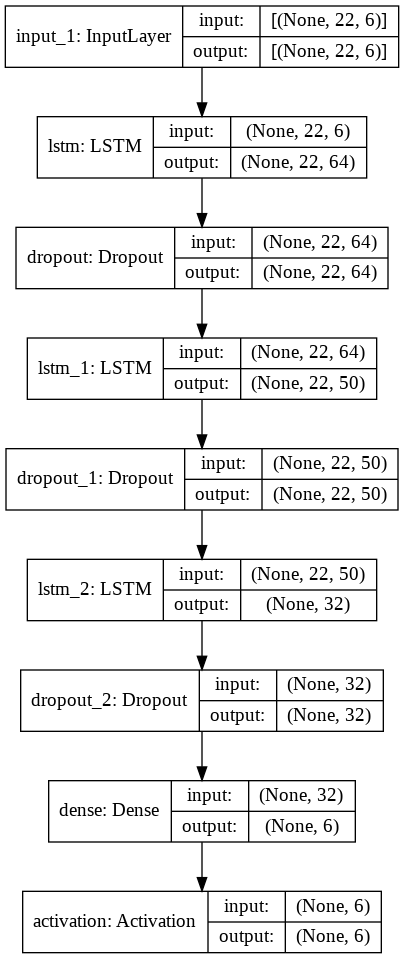

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = trained_model, show_shapes = True, show_layer_names = True)

In [ ]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-3grod61s
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-3grod61s


In [ ]:


from google.colab import drive
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt
from pytz import timezone

import pandas_datareader.data as web

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
symbol = ['BB']

In [ ]:
drive.mount('/content/drive')

#base_folder_1 = '/content/drive/MyDrive/Stock Price Prediction/' + 'BestModel.h5_tsla_20210804-121528' + '/'
#base_folder_1 = '/content/drive/MyDrive/Stock Price Prediction/' + 'BestModel.h5_tsla_20210805-153722' + '/'
base_folder_1 = '/content/drive/MyDrive/Stock Price Prediction/' + file_dir + '/'
base_folder_1


os.chdir(base_folder_1)

from tensorflow.keras.models import load_model
trained_model = load_model(base_folder_1)

for index_1, value_1 in enumerate(symbol):
  exec("monitor_{x} = pd.read_csv('monitor_{x}.csv')".format(x = value_1.lower().replace('-', '_')))
  exec("price_{x} = pd.read_csv('price_{x}.csv')".format(x = value_1.lower().replace('-', '_')))
  exec("last_epoch = monitor_{x}.shape[0]".format(x = value_1.lower().replace('-', '_')))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


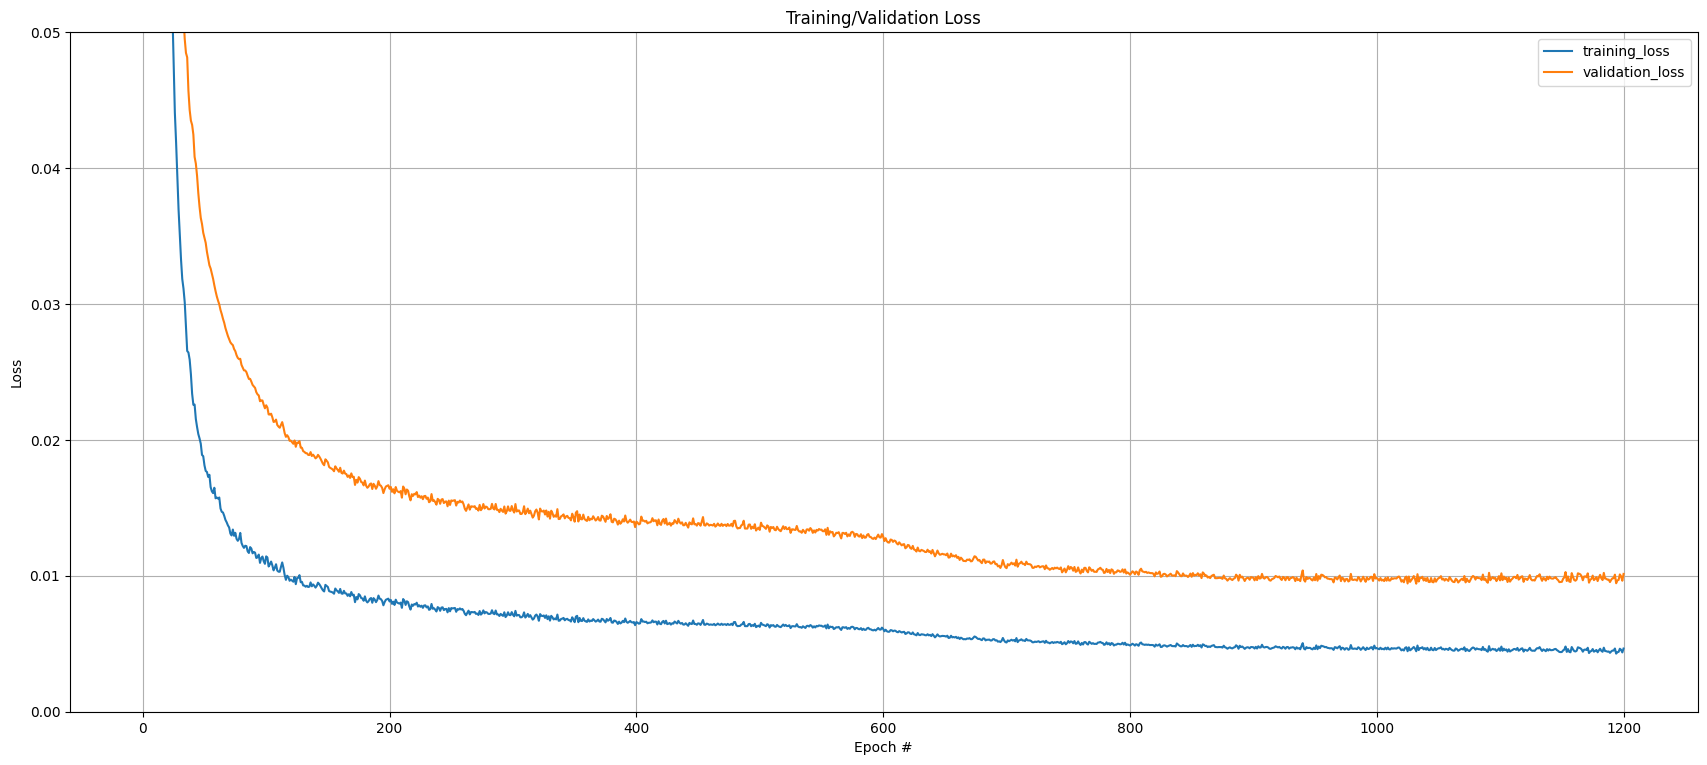

In [ ]:
plt.figure(figsize = (21, 9), dpi = 100)
exec("plt.plot(np.arange(1, last_epoch + 1, 1), monitor_{x}['train_loss'], label = 'training_loss')".format(x = symbol[0].lower().replace('-', '_')))
exec("plt.plot(np.arange(1, last_epoch + 1, 1), monitor_{x}['val_loss'],label = 'validation_loss')".format(x = symbol[0].lower().replace('-', '_')))
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title(f'Training/Validation Loss')
plt.legend() 
plt.ylim(ymin = 0, ymax = 0.05)
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

In [ ]:
for value_1 in target_column:
  exec("actual_{z}_{x} = price_{x}['{y}'].values.tolist()".format(x = symbol[0].lower().replace('-', '_'), y = value_1, z = value_1.lower().replace(' ', '_')))
  exec("predicted_{z}_{x} = price_{x}['{y} predicted'].values.tolist()".format(x = symbol[0].lower().replace('-', '_'), y = value_1, z = value_1.lower().replace(' ', '_')))

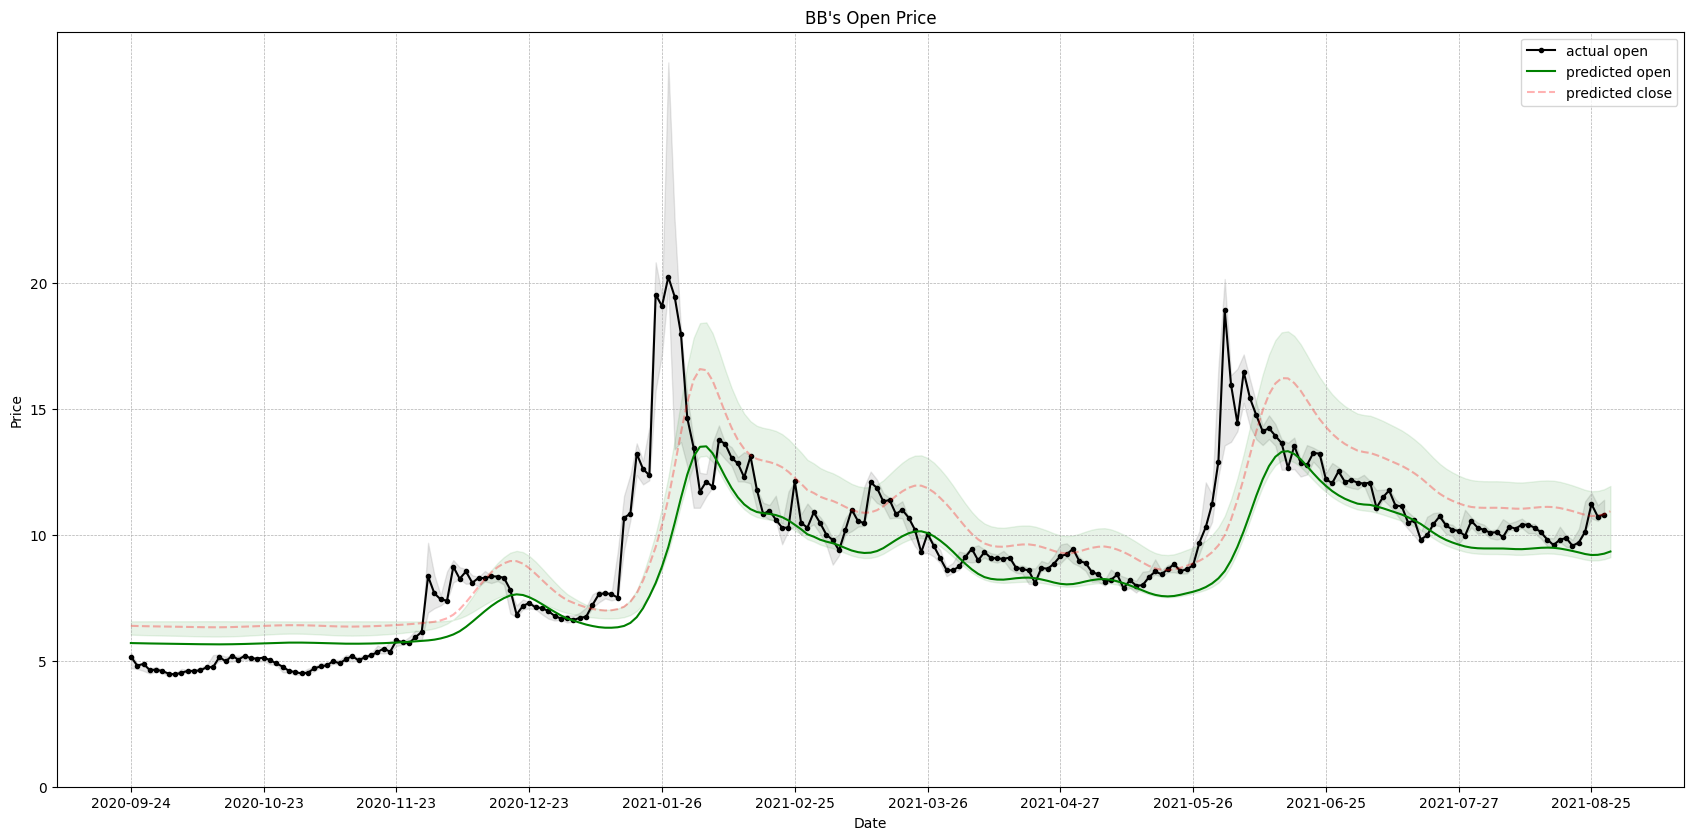

In [ ]:
plt.figure(figsize = (21, 10), dpi = 100)

for index_1, value_1 in enumerate(symbol):
  exec('xs_act = list(range(0, len(actual_open_{x})))'.format(x = value_1.lower().replace('-', '_'))) 
  exec('xs_pre = list(range(0, len(predicted_open_{x})))'.format(x = value_1.lower().replace('-', '_'))) 
  exec("plt.plot(xs_act, actual_open_{x}, color = 'black', label = 'actual open', marker = '.', linestyle = '-')".format(x = value_1.lower().replace('-', '_'))) 
  exec("plt.plot(xs_pre, predicted_open_{x}, color = 'green', label = 'predicted open')".format(x = value_1.lower().replace('-', '_')))
  exec("plt.plot(xs_pre, predicted_close_{x}, color = 'red', label = 'predicted close', linestyle = '--', alpha = 0.3)".format(x = value_1.lower().replace('-', '_')))
  exec("plt.fill_between(xs_act, actual_low_{x}, actual_high_{x}, alpha = 0.09, color = 'black')".format(x = value_1.lower().replace('-', '_')))
  exec("plt.fill_between(xs_pre, predicted_low_{x}, predicted_high_{x}, alpha = 0.09, color = 'green')".format(x = value_1.lower().replace('-', '_')))
  plt.title("{x}'s Open Price".format(x = value_1.upper())) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 

exec("plt.xticks(np.arange(min(xs_act), max(xs_act) + 1, prediction_days - 1), pd.DataFrame(price_{x}['Date'].astype(str)).iloc[np.arange(min(xs_act), max(xs_act), prediction_days - 1).tolist()].values.reshape(-1,).tolist())".format(x = symbol[0].lower().replace('-', '_')))

import math
import numpy as np
#exec('ymin = int(math.floor( min(min(actual_open_{x}), np.min(predicted_open_{x})) / 100 )) * 100'.format(x = symbol[0].lower().replace('-', '_')))
#exec('ymax = int(math.ceil( max(max(actual_open_{x}), np.max(predicted_open_{x})) / 100 )) * 100'.format(x = symbol[0].lower().replace('-', '_')))
#plt.yticks(np.arange(ymin, ymax + 50, 50).tolist())
plt.yticks(np.arange(0,25,5).tolist())


plt.grid(linestyle = '--', linewidth = 0.5)

plt.show()

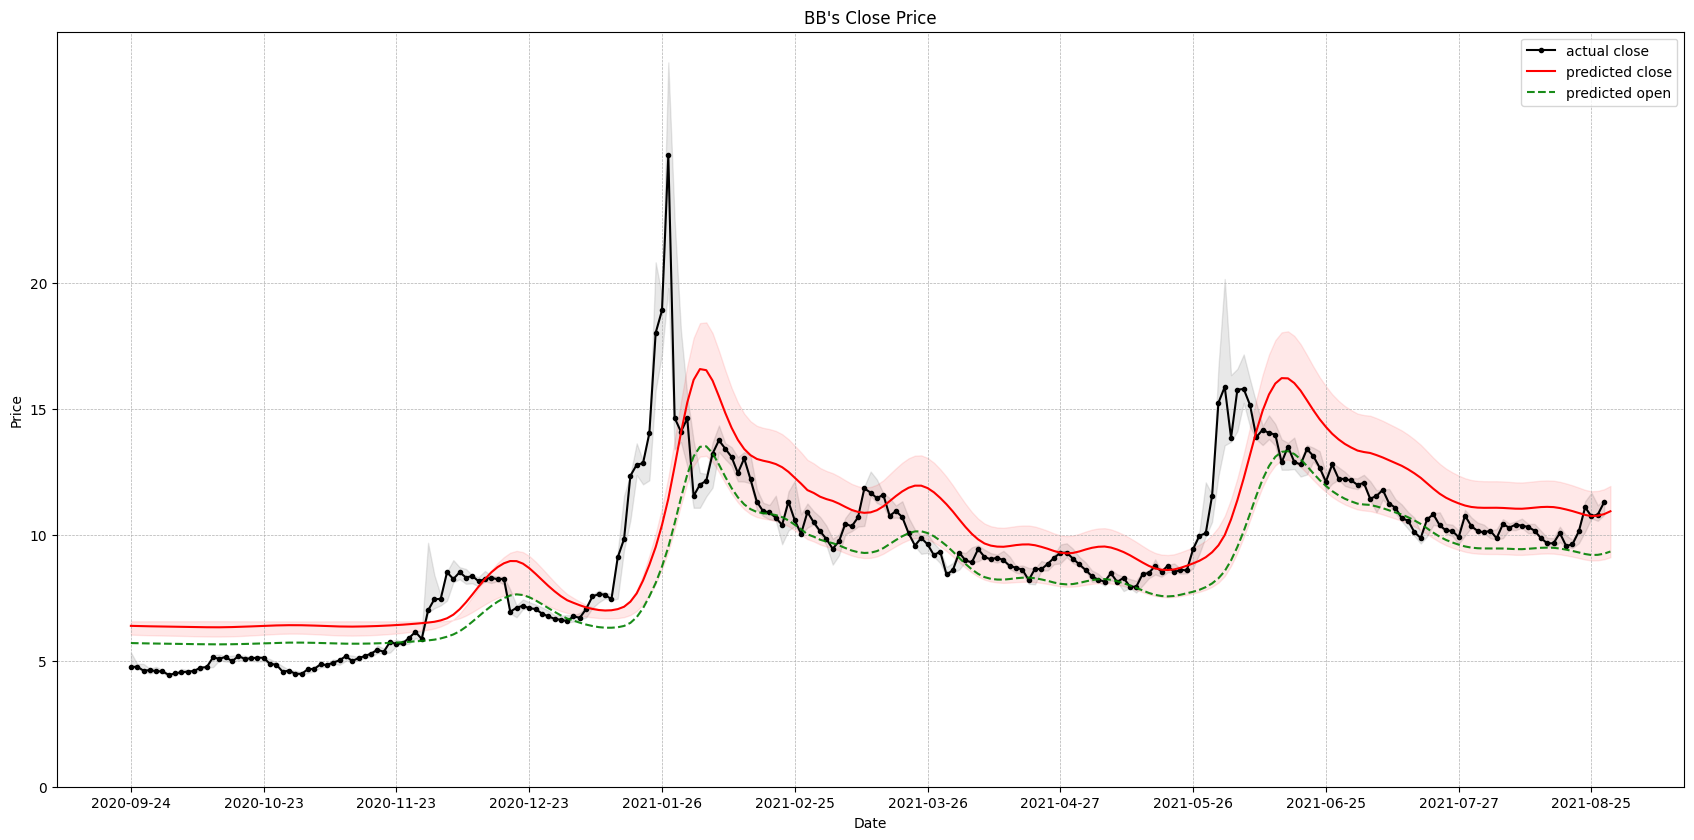

In [ ]:
plt.figure(figsize = (21, 10), dpi = 100)

for index_1, value_1 in enumerate(symbol):
  exec('xs_act = list(range(0, len(actual_close_{x})))'.format(x = value_1.lower().replace('-', '_'))) 
  exec('xs_pre = list(range(0, len(predicted_close_{x})))'.format(x = value_1.lower().replace('-', '_'))) 
  exec("plt.plot(xs_act, actual_close_{x}, color = 'black', label = 'actual close', marker = '.')".format(x = value_1.lower().replace('-', '_'))) 
  exec("plt.plot(xs_pre, predicted_close_{x}, color = 'red', label = 'predicted close')".format(x = value_1.lower().replace('-', '_')))
  exec("plt.plot(xs_pre, predicted_open_{x}, color = 'green', label = 'predicted open', linestyle = '--', alpha = 0.9)".format(x = value_1.lower().replace('-', '_')))
  exec("plt.fill_between(xs_act, actual_low_{x}, actual_high_{x}, alpha = 0.09, color = 'black')".format(x = value_1.lower().replace('-', '_')))
  exec("plt.fill_between(xs_pre, predicted_low_{x}, predicted_high_{x}, alpha = 0.09, color = 'red')".format(x = value_1.lower().replace('-', '_')))
  plt.title("{x}'s Close Price".format(x = value_1.upper())) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 

exec("plt.xticks(np.arange(min(xs_act), max(xs_act) + 1, prediction_days - 1), pd.DataFrame(price_{x}['Date'].astype(str)).iloc[np.arange(min(xs_act), max(xs_act), prediction_days - 1).tolist()].values.reshape(-1,).tolist())".format(x = symbol[0].lower().replace('-', '_')))

#import math
#import numpy as np
#exec('ymin = int(math.floor( min(min(actual_close_{x}), np.min(predicted_close_{x})) / 100 )) * 100'.format(x = symbol[0].lower().replace('-', '_')))
#exec('ymax = int(math.ceil( max(max(actual_close_{x}), np.max(predicted_close_{x})) / 100 )) * 100'.format(x = symbol[0].lower().replace('-', '_')))
#plt.yticks(np.arange(ymin, ymax + 50, 50).tolist())

plt.yticks(np.arange(0,25,5).tolist())


plt.grid(linestyle = '--', linewidth = 0.5)

plt.show()

In [ ]:
real_data = scaler_0.fit_transform(model_inputs_0)
real_data = real_data[len(real_data) - prediction_days: len(real_data), :] 
real_data = np.array(real_data)

if real_data.ndim == 2: real_data = np.reshape(real_data, (1, real_data.shape[0], real_data.shape[1]))

prediction = model.predict(real_data)
prediction = scaler_0.inverse_transform(prediction)
prediction

array([[1.1864406e+01, 9.0515118e+00, 9.2595243e+00, 1.0844626e+01,
        4.0822500e+07, 1.0595202e+01]], dtype=float32)